## Machine Learning

I will start with a statistic model (GradientBoosTree?) and will later on continue with a LSTM RNN or CNN

In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [156]:
laugh_data = pd.read_csv('laugh_data.csv')
print(laugh_data.shape)

(4282, 20)


In [256]:
laugh_data.columns

Index(['line', 'funny?', 'episode', 'tokens', 'mean_humor', 'max_humor',
       'mean_ambiguity', 'max_ambiguity', 'len_utterance', 'num_nouns',
       'proportion_nouns', 'num_verbs', 'proportion_verbs', 'num_adjectives',
       'proportion_adjectives', 'num_adverbs', 'proportion_adverbs',
       'antonyms', 'semantic_distance', 'funny'],
      dtype='object')

In [277]:
laugh_data_manual = pd.read_csv('laugh_data_manual.csv')
print(laugh_data_manual.shape)

(2180, 19)


In [255]:
laugh_data_manual.columns

Index(['line', 'episode', 'tokens', 'mean_humor', 'max_humor',
       'mean_ambiguity', 'max_ambiguity', 'len_utterance', 'num_nouns',
       'proportion_nouns', 'num_verbs', 'proportion_verbs', 'num_adjectives',
       'proportion_adjectives', 'num_adverbs', 'proportion_adverbs',
       'antonyms', 'semantic_distance', 'funny'],
      dtype='object')

Eine Folge der Serie soll als Test dienen, während die anderen für Train und Validate verwendet werden.

In [274]:
training_data = laugh_data.loc[laugh_data['episode'] != 'The Middle Earth Paradigm']
test_data = laugh_data.loc[laugh_data['episode'] == 'The Middle Earth Paradigm']
print(training_data.shape)
print(test_data.shape)

(3925, 20)
(357, 20)


In [278]:
training_data_manual = laugh_data_manual.loc[laugh_data_manual['episode'] != 'The Middle Earth Paradigm']
test_data_manual = laugh_data_manual.loc[laugh_data_manual['episode'] == 'The Middle Earth Paradigm']
print(training_data_manual.shape)
print(test_data_manual.shape)

(1823, 19)
(357, 19)


In [159]:
feature_columns = ['mean_humor', 'max_humor', 'mean_ambiguity',
       'max_ambiguity', 'len_utterance', 'num_nouns', 'proportion_nouns',
       'num_verbs', 'proportion_verbs', 'num_adjectives',
       'proportion_adjectives', 'num_adverbs', 'proportion_adverbs', 'antonyms','semantic_distance']
target_columns = ['funny']

In [154]:
X = training_data[feature_columns]

In [160]:
X_train, X_validate, y_train, y_validate = train_test_split(training_data[feature_columns], 
                                                            training_data[target_columns],
                                                           test_size=0.8, random_state=42) 
X_test = test_data[feature_columns]
y_test = test_data[target_columns]

In [279]:
X_manual_train, X_manual_validate, y_manual_train, y_manual_validate = train_test_split(training_data_manual[feature_columns], 
                                                            training_data_manual[target_columns],
                                                           test_size=0.8, random_state=42) 
X_manual_test = test_data_manual[feature_columns]
y_manual_test = test_data_manual[target_columns]

The data is scaled with a standard scaler that standardized the data to have a mean 0 and variance 1.

In [275]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train[feature_columns] = scaler.fit_transform(X_train[feature_columns])
X_validate[feature_columns] = scaler.fit_transform(X_validate[feature_columns])
X_test[feature_columns] = scaler.fit_transform(X_test[feature_columns])

In [280]:
scaler_manual = StandardScaler() 
scaler_manual.fit(X_manual_train)
X_manual_train[feature_columns] = scaler_manual.fit_transform(X_manual_train[feature_columns])
X_manual_validate[feature_columns] = scaler_manual.fit_transform(X_manual_validate[feature_columns])
X_manual_test[feature_columns] = scaler_manual.fit_transform(X_manual_test[feature_columns])

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [164]:
feature_stats = pd.DataFrame(index=feature_columns)
mins = [round(X_train[feature].min(),2) for feature in feature_columns]
maxs = [round(X_train[feature].max(),2) for feature in feature_columns]
feature_stats['min'] = mins
feature_stats['max'] = maxs
feature_stats

min   max
mean_humor            -1.11  4.20
max_humor             -1.46  1.86
mean_ambiguity        -1.60  7.52
max_ambiguity         -1.54  4.29
len_utterance         -1.79  2.63
num_nouns             -1.34  3.54
proportion_nouns      -1.21  3.29
num_verbs             -1.26  4.32
proportion_verbs      -1.38  4.96
num_adjectives        -0.73  3.52
proportion_adjectives -0.62  8.86
num_adverbs           -0.71  6.13
proportion_adverbs    -0.56  7.08
antonyms              -0.18  5.63
semantic_distance     -2.69  2.22

In [281]:
feature_stats_manual = pd.DataFrame(index=feature_columns)
mins = [round(X_manual_train[feature].min(),2) for feature in feature_columns]
maxs = [round(X_manual_train[feature].max(),2) for feature in feature_columns]
feature_stats_manual['min'] = mins
feature_stats_manual['max'] = maxs
feature_stats_manual

min   max
mean_humor            -1.04  3.98
max_humor             -1.42  2.11
mean_ambiguity        -1.92  5.76
max_ambiguity         -1.52  4.26
len_utterance         -1.80  2.93
num_nouns             -1.32  4.01
proportion_nouns      -1.21  3.13
num_verbs             -1.29  3.23
proportion_verbs      -1.46  3.29
num_adjectives        -0.73  3.75
proportion_adjectives -0.67  4.63
num_adverbs           -0.69  4.62
proportion_adverbs    -0.60  8.68
antonyms              -0.18  5.66
semantic_distance     -2.55  2.06

Nachfolgend werden die Features und Zielwerte des Trainings- und Validierungsdatensatzes vergleichen, um zu überprüfen, ob sie die gleiche Verteilung haben.

Links ist jeweils die Verteilung in den Trainingsdaten und rechts in den Validierungsdaten dargestellt

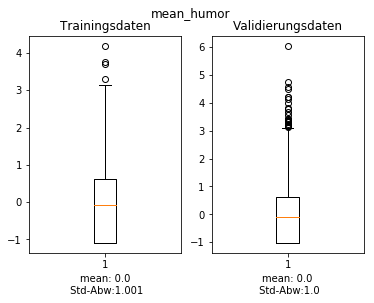

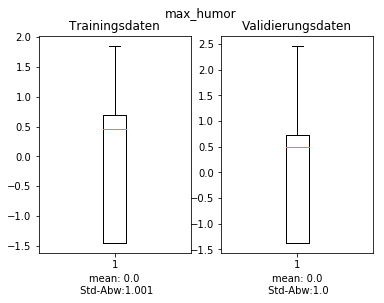

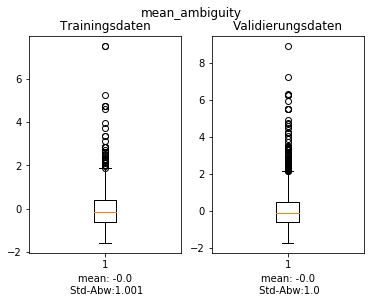

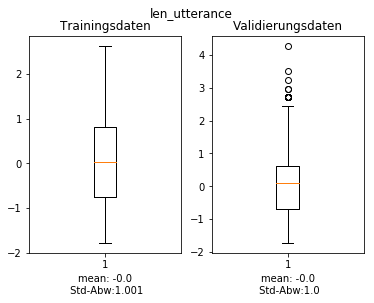

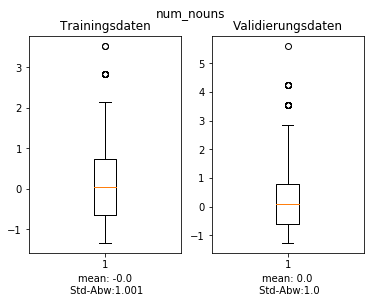

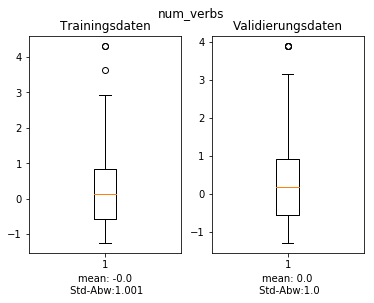

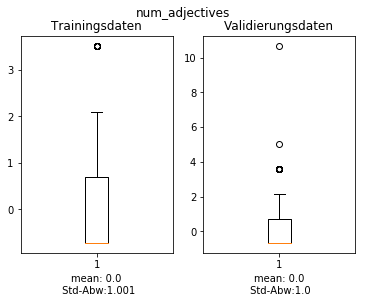

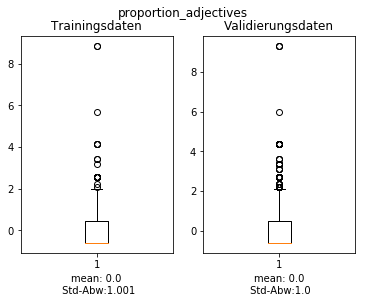

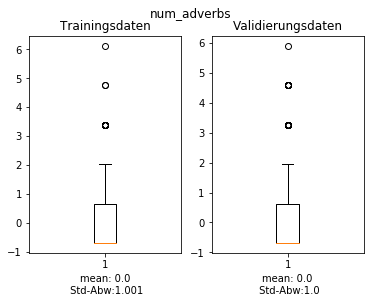

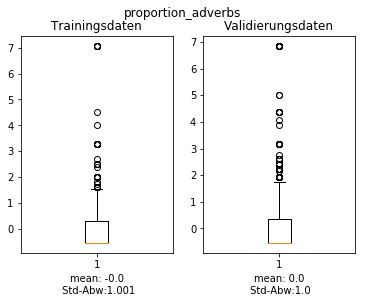

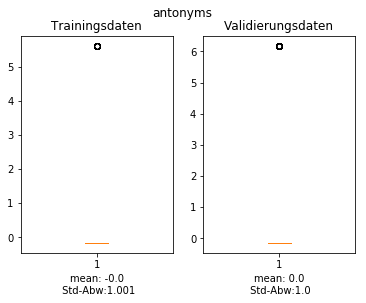

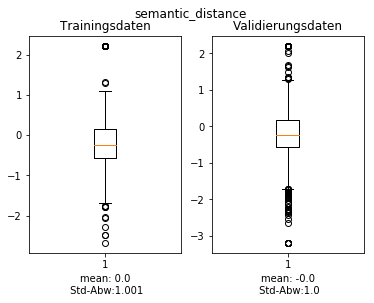

In [165]:
%matplotlib inline  
for column in X_train:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(column)
    ax1.set_title('Trainingsdaten')
    ax1.set_xlabel('mean: ' + str(round(X_train[column].mean(),3)) + '\n Std-Abw:' + str(round(X_train[column].std(),3)))
    ax2.set_title('Validierungsdaten')
    ax2.set_xlabel('mean: ' + str(round(X_validate[column].mean(),3))+ '\n Std-Abw:' + str(round(X_validate[column].std(),3)))
    ax1.boxplot(X_train[column])
    ax2.boxplot(X_validate[column])

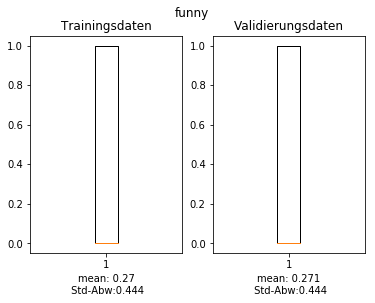

In [100]:
%matplotlib inline  
for column in y_train:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(column)
    ax1.set_title('Trainingsdaten')
    ax1.set_xlabel('mean: ' + str(round(y_train[column].mean(),3)) + '\n Std-Abw:' + str(round(y_train[column].std(),3)))
    ax2.set_title('Validierungsdaten')
    ax2.set_xlabel('mean: ' + str(round(y_validate[column].mean(),3))+ '\n Std-Abw:' + str(round(y_validate[column].std(),3)))
    ax1.boxplot(y_train[column])
    ax2.boxplot(y_validate[column])

## Performance Measures

* Accuracy
* Precision
* Recall
* F-score
(wie in dem Paper)

## Dummy Classifier

Always predicts funny.

In [237]:
dummy_predictions = X_test.copy()
dummy_predictions['predictions'] = 1
dummy_predictions=dummy_predictions.drop(feature_columns, axis=1)
dummy_predictions.to_csv('results/dummy_classifier.csv')

## GradientBoostingClassifier

With a grid search, we find out the best hyperparamters. FRom the docs we learn that it makes sense to tune max_depth and n_estimators

In [151]:
parameters = {'max_depth': [3, 5 ,10], 'n_estimators': [100, 500, 1000, 10000]}
gbc = GradientBoostingClassifier()
grid = GridSearchCV(gbc, parameters)
grid.fit(X_train, y_train)

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 10], 'n_estimators': [100, 500, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [103]:
grid.best_score_

0.6955414012738853

The best estimator uses `max_depth=3` and `n_estimators=1000`

In [294]:
gbc = GradientBoostingClassifier(max_depth=3, n_estimators=100)
gbc.fit(X_train, y_train)

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [295]:
gbc_predictions = X_test.copy()
gbc_predictions['predictions'] = gbc.predict(X_test)
gbc_predictions=gbc_predictions.drop(feature_columns, axis=1)
gbc_predictions.to_csv('results/gradient_boosting_classifier.csv')

In [296]:
print('Mean Acc. auf validation data: ' + str(gbc.score(X_validate, y_validate)))
print('Mean Acc. auf test data: ' + str(gbc.score(X_test, y_test)))

Mean Acc. auf validation data: 0.7009554140127389
Mean Acc. auf test data: 0.7310924369747899


## LogisticRegression

In [193]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log = LogisticRegression(penalty='l2')
grid = GridSearchCV(log, param_grid)
grid.fit(X_train, y_train)
grid.best_estimator_

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [297]:
log = LogisticRegression(penalty='l2', C=0.1).fit(X_train, y_train)
print('Mean Acc. auf validation data: ' + str(log.score(X_validate, y_validate)))
print('Mean Acc. auf test data: ' + str(log.score(X_test, y_test)))

Mean Acc. auf validation data: 0.7277070063694268
Mean Acc. auf test data: 0.773109243697479


/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [298]:
log_predictions = X_test.copy()
log_predictions['predictions'] = log.predict(X_test)
log_predictions=log_predictions.drop(feature_columns, axis=1)
log_predictions.to_csv('results/logistic_regression_classifier.csv')

In [309]:
coefficients = pd.DataFrame(index=feature_columns)
coefficients['reg_coefficients'] = [round(coef,3) for coef in log.coef_[0]]

In [310]:
coefficients.reindex(coefficients.reg_coefficients.abs().sort_values(ascending=False).index)

reg_coefficients
num_verbs                        -0.203
max_ambiguity                     0.195
proportion_adjectives            -0.183
proportion_nouns                 -0.168
num_adjectives                    0.164
max_humor                         0.121
proportion_verbs                  0.118
len_utterance                    -0.060
num_nouns                         0.044
mean_ambiguity                    0.040
mean_humor                       -0.035
antonyms                          0.021
num_adverbs                       0.019
proportion_adverbs               -0.010
semantic_distance                -0.003

## Support Vector Machine

In [213]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
svm = SVC(gamma='auto')
grid = GridSearchCV(svm, param_grid)
grid.fit(X_train, y_train)
grid.best_estimator_

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [214]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [311]:
svm = SVC(gamma='auto', C=1)
svm.fit(X_train, y_train)
print('Mean Acc. auf validation data: ' + str(svm.score(X_validate, y_validate)))
print('Mean Acc. auf test data: ' + str(svm.score(X_test, y_test)))

Mean Acc. auf validation data: 0.729936305732484
Mean Acc. auf test data: 0.7703081232492998


/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [312]:
svm_predictions = X_test.copy()
svm_predictions['predictions'] = svm.predict(X_test)
svm_predictions=svm_predictions.drop(feature_columns, axis=1)
svm_predictions.to_csv('results/svm_classifier.csv')

## MultiLayerPerceptron

In [216]:
X_train.shape

(785, 15)

In [225]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'hidden_layer_sizes': [(7,3),(7,5,3),(10,7,3,3),(10,7,7,3,3) ,(7,3,3),(7,7,3),]}
mlp = MLPClassifier(solver='lbfgs')
grid = GridSearchCV(mlp, param_grid)
grid.fit(X_train, y_train)
grid.best_estimator_


/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [313]:
mlp = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(7, 3, 3))
mlp.fit(X_train, y_train)

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [314]:
mlp_predictions = X_test.copy()
mlp_predictions['predictions'] = mlp.predict(X_test)
mlp_predictions=mlp_predictions.drop(feature_columns, axis=1)
mlp_predictions.to_csv('results/mlp_classifier.csv')

## Performance Evaluation

In [315]:
predicitions = {'Dummy (always funny)' : dummy_predictions, 'Logistic Regression' : log_predictions, 'SVM' : svm_predictions, 'MLP': mlp_predictions} 
evaluation = pd.DataFrame(index=models.keys())
evaluation['Accuracy'] = [round(accuracy_score(y_test, prediction),2) for prediction in predicitions.values()]
evaluation['Precision'] = [round(precision_score(y_test, prediction, average='macro'),2) for prediction in predicitions.values()]
evaluation['Recall'] = [round(recall_score(y_test, prediction, average='macro'),2) for prediction in predicitions.values()]
evaluation['F1-score'] = [round(f1_score(y_test, prediction, average='macro'),2) for prediction in predicitions.values()]

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [316]:
evaluation

Accuracy  Precision  Recall  F1-score
Dummy (always funny)      0.23       0.11    0.50      0.18
Logistic Regression       0.77       0.39    0.50      0.44
SVM                       0.77       0.39    0.50      0.44
MLP                       0.70       0.52    0.51      0.51

# Für die manauellen Daten:



In [325]:
dummy_predictions = X_manual_test.copy()
dummy_predictions['predictions'] = 1
dummy_predictions=dummy_predictions.drop(feature_columns, axis=1)
dummy_predictions.to_csv('results/dummy_classifier_manual.csv')

In [317]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log = LogisticRegression(penalty='l2')
grid = GridSearchCV(log, param_grid)
grid.fit(X_manual_train, y_manual_train)
grid.best_estimator_


/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [323]:
log = LogisticRegression(penalty='l2', C=0.1).fit(X_manual_train, y_manual_train)
print('Mean Acc. auf validation data: ' + str(log.score(X_manual_validate, y_manual_validate)))
print('Mean Acc. auf test data: ' + str(log.score(X_manual_test, y_manual_test)))

log_predictions_manual = X_manual_test.copy()
log_predictions_manual['predictions_manual'] = log.predict(X_manual_test)
log_predictions_manual=log_predictions_manual.drop(feature_columns, axis=1)
log_predictions_manual.to_csv('results/logistic_regression_classifier_manual.csv')

coefficients = pd.DataFrame(index=feature_columns)
coefficients['reg_coefficients'] = log.coef_[0]

coefficients.reindex(coefficients.reg_coefficients.abs().sort_values(ascending=False).index)

Mean Acc. auf validation data: 0.6812885538039753
Mean Acc. auf test data: 0.680672268907563


/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


reg_coefficients
num_verbs                     -0.316113
proportion_adjectives         -0.243510
num_adjectives                 0.191350
num_adverbs                   -0.187375
mean_ambiguity                -0.159226
mean_humor                     0.152943
proportion_nouns              -0.137266
max_humor                      0.136854
proportion_verbs               0.082113
len_utterance                 -0.081404
antonyms                       0.066756
num_nouns                      0.059189
max_ambiguity                  0.056929
proportion_adverbs             0.044911
semantic_distance              0.009159

## Support Vector Machine

In [285]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
svm = SVC(gamma='auto')
grid = GridSearchCV(svm, param_grid)
grid.fit(X_manual_train, y_manual_train)
grid.best_estimator_

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [214]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [319]:
svm = SVC(gamma='auto', C=1)
svm.fit(X_manual_train, y_manual_train)
print('Mean Acc. auf validation data: ' + str(svm.score(X_manual_validate, y_manual_validate)))
print('Mean Acc. auf test data: ' + str(svm.score(X_manual_test, y_manual_test)))

Mean Acc. auf validation data: 0.6949965729952022
Mean Acc. auf test data: 0.7030812324929971


/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [320]:
svm_predictions_manual = X_manual_test.copy()
svm_predictions_manual['predictions_manual'] = svm.predict(X_manual_test)
svm_predictions_manual=svm_predictions_manual.drop(feature_columns, axis=1)
svm_predictions_manual.to_csv('results/svm_classifier_manual.csv')

## MultiLayerPerceptron

In [288]:
X_manual_train.shape

(364, 15)

In [289]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'hidden_layer_sizes': [(7,3),(7,5,3),(10,7,3,3),(10,7,7,3,3) ,(7,3,3),(7,7,3),]}
mlp = MLPClassifier(solver='lbfgs')
grid = GridSearchCV(mlp, param_grid)
grid.fit(X_manual_train, y_manual_train)
grid.best_estimator_


/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [321]:
mlp = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(7, 7, 3))
mlp.fit(X_manual_train, y_manual_train)

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [322]:
mlp_predictions_manual = X_manual_test.copy()
mlp_predictions_manual['predictions_manual'] = mlp.predict(X_manual_test)
mlp_predictions_manual=mlp_predictions_manual.drop(feature_columns, axis=1)
mlp_predictions_manual.to_csv('results/mlp_classifier_manual.csv')

## Performance Evaluation

In [328]:
predicitions = {'Dummy (always funny)' : dummy_predictions, 'Logistic Regression' : log_predictions_manual, 'SVM' : svm_predictions_manual, 'MLP': mlp_predictions_manual} 
evaluation = pd.DataFrame(index=models.keys())
evaluation['Accuracy'] = [round(accuracy_score(y_manual_test, prediction),2) for prediction in predicitions.values()]
evaluation['Precision'] = [round(precision_score(y_manual_test, prediction, average='macro'),2) for prediction in predicitions.values()]
evaluation['Recall'] = [round(recall_score(y_manual_test, prediction, average='macro'),2) for prediction in predicitions.values()]
evaluation['F1-score'] = [round(f1_score(y_manual_test, prediction, average='macro'),2) for prediction in predicitions.values()]

/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/miriamamin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [329]:
evaluation

Accuracy  Precision  Recall  F1-score
Dummy (always funny)      0.30       0.15    0.50      0.23
Logistic Regression       0.68       0.40    0.49      0.41
SVM                       0.70       0.60    0.50      0.42
MLP                       0.57       0.51    0.51      0.51